# Using the Multi-view Clustering Algorithm to Cluster Data with Multiple Views

In [1]:
from mvlearn.datasets.base import load_UCImultifeature
from mvlearn.cluster import MultiviewCoRegSpectralClustering
from mvlearn.plotting import quick_visualize
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score as nmi_score
import scipy
import warnings

warnings.simplefilter('ignore') # Ignore warnings
%matplotlib inline
RANDOM_SEED=10

##### Load the UCI Digits Multiple Features Data Set as an Example Data Set

In [2]:
# Load dataset along with labels for digits 0 through 4
n_class = 5
m_data, labels = load_UCImultifeature(select_labeled = list(range(n_class)))

## Running Co-Regularized Multi-view Spectral Clustering on the Data with 6 Views
Here we will compare the performance of the Co-Regularized Multi-view and Single-view versions of spectral clustering. We will evaluate the purity of the resulting clusters from each algorithm with respect to the class labels using the normalized mutual information metric. <br>

As we can see, Co-Regularized Multi-view clustering produces clusters with higher purity compared to those produced by Single-view clustering for all 3 input types.

In [3]:
#################Single-view spectral clustering#####################
# Cluster each view separately and compute nmi
s_spectral = SpectralClustering(n_clusters=n_class, random_state=RANDOM_SEED, n_init=100)

for i in range(len(m_data)):
    s_clusters = s_spectral.fit_predict(m_data[i])
    s_nmi = nmi_score(labels, s_clusters, average_method='arithmetic')
    print('Single-view View {0:d} NMI Score: {1:.3f}\n'.format(i + 1, s_nmi))

# Concatenate the multiple views into a single view and produce clusters
s_data = np.hstack(m_data)
s_clusters = s_spectral.fit_predict(s_data)

s_nmi = nmi_score(labels, s_clusters)
print('Single-view Concatenated NMI Score: {0:.3f}\n'.format(s_nmi))

#######Co-Regularized Multi-view spectral clustering##################


# Use the MultiviewSpectralClustering instance to cluster the data
m_spectral1 = MultiviewCoRegSpectralClustering(n_clusters=n_class, 
            random_state=RANDOM_SEED, n_init=100)
m_clusters1 = m_spectral1.fit_predict(m_data)

# Compute nmi between true class labels and multi-view cluster labels
m_nmi1 = nmi_score(labels, m_clusters1)
print('Multi-view NMI Score: {0:.3f}\n'.format(m_nmi1))

Single-view View 1 NMI Score: 0.620

Single-view View 2 NMI Score: 0.007

Single-view View 3 NMI Score: 0.004

Single-view View 4 NMI Score: -0.000

Single-view View 5 NMI Score: 0.007

Single-view View 6 NMI Score: 0.010

Single-view Concatenated NMI Score: 0.008

Multi-view NMI Score: 0.866



##### Plots of clusters produced by multi-view spectral clustering and the true clusters

We will display the clustering results of the Co-Regularized Multi-view spectral clustering algorithm below, along with the true class labels.



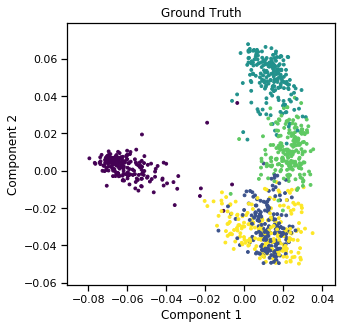

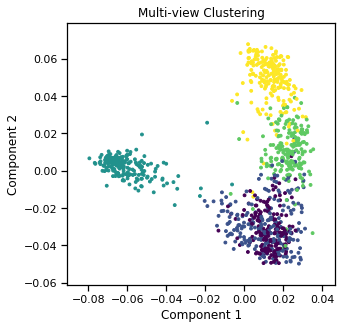

In [4]:
quick_visualize(m_data, labels=labels, title='Ground Truth', scatter_kwargs={'s':8})
quick_visualize(m_data, labels=m_clusters1, title='Multi-view Clustering', scatter_kwargs={'s':8})